In [9]:
import pandas as pd

# Specify columns to read
usecols = ['Col1', 'batter', 'total_runs_delivery', 'balls_faced', 'winning_team']

# Read the CSV file with selected columns
df = pd.read_csv("merged_data.csv", usecols=usecols)

# Display the first few rows of the DataFrame
print(df.head())


   Col1     batter  total_runs_delivery  balls_faced winning_team
0     0   AJ Finch                    0            1    Sri Lanka
1     1   AJ Finch                    0            2    Sri Lanka
2     2   AJ Finch                    1            3    Sri Lanka
3     3  M Klinger                    2            1    Sri Lanka
4     4  M Klinger                    0            2    Sri Lanka


In [14]:
import pandas as pd

df = pd.read_csv("merged_data.csv", usecols=['Col1', 'batter', 'total_runs_delivery', 'balls_faced', 'winning_team'])

innings_groups = df.groupby('Col1')

most_balled_batters = []

for inning, group in innings_groups:
    most_balled_batter = group.loc[group['balls_faced'].idxmax()]
    most_balled_batters.append(most_balled_batter)

most_balled_batters_df = pd.DataFrame(most_balled_batters)

print(most_balled_batters_df)


        Col1        batter  total_runs_delivery  balls_faced winning_team
0          0      AJ Finch                    0            1    Sri Lanka
1          1      AJ Finch                    0            2    Sri Lanka
2          2      AJ Finch                    1            3    Sri Lanka
500        3      AJ Finch                    0            4    Australia
501        4      AJ Finch                    1            5    Australia
...      ...           ...                  ...          ...          ...
120910   132    RD Gaikwad                    6           62    Australia
29882    133   Hazratullah                    4           73  Afghanistan
152917   134     RA Jadeja                    1            5  West Indies
125929   135  Taskin Ahmed                    1            3    Sri Lanka
152919   136     RA Jadeja                    1            6  West Indies

[137 rows x 5 columns]


In [15]:

most_balled_batters_df['strike_rate'] = most_balled_batters_df['total_runs_delivery'] / most_balled_batters_df['balls_faced']

print(most_balled_batters_df.head())


     Col1    batter  total_runs_delivery  balls_faced winning_team  \
0       0  AJ Finch                    0            1    Sri Lanka   
1       1  AJ Finch                    0            2    Sri Lanka   
2       2  AJ Finch                    1            3    Sri Lanka   
500     3  AJ Finch                    0            4    Australia   
501     4  AJ Finch                    1            5    Australia   

     strike_rate  
0       0.000000  
1       0.000000  
2       0.333333  
500     0.000000  
501     0.200000  


In [17]:

innings_groups = df.groupby('Col1')

mean_strike_rates = []

for inning, group in innings_groups:
    most_balled_batter = group.loc[group['balls_faced'].idxmax()]
    
    other_batters_group = group[group['batter'] != most_balled_batter['batter']]

    total_runs = other_batters_group['total_runs_delivery'].sum()
    total_balls = other_batters_group['balls_faced'].sum()

    if total_balls == 0:
        mean_strike_rate = np.nan 
    else:
        mean_strike_rate = total_runs / total_balls
    
    mean_strike_rates.append(mean_strike_rate)

most_balled_batters_df['mean_strike_rate'] = mean_strike_rates

print(most_balled_batters_df.head())


     Col1    batter  total_runs_delivery  balls_faced winning_team  \
0       0  AJ Finch                    0            1    Sri Lanka   
1       1  AJ Finch                    0            2    Sri Lanka   
2       2  AJ Finch                    1            3    Sri Lanka   
500     3  AJ Finch                    0            4    Australia   
501     4  AJ Finch                    1            5    Australia   

     strike_rate  mean_strike_rate  
0       0.000000          0.824505  
1       0.000000          0.564923  
2       0.333333          0.448244  
500     0.000000          0.381836  
501     0.200000          0.331080  


In [18]:

most_balled_batters_df['strike_rate_greater_than_mean'] = most_balled_batters_df['strike_rate'] > most_balled_batters_df['mean_strike_rate']

print(most_balled_batters_df.head())


     Col1    batter  total_runs_delivery  balls_faced winning_team  \
0       0  AJ Finch                    0            1    Sri Lanka   
1       1  AJ Finch                    0            2    Sri Lanka   
2       2  AJ Finch                    1            3    Sri Lanka   
500     3  AJ Finch                    0            4    Australia   
501     4  AJ Finch                    1            5    Australia   

     strike_rate  mean_strike_rate  strike_rate_greater_than_mean  
0       0.000000          0.824505                          False  
1       0.000000          0.564923                          False  
2       0.333333          0.448244                          False  
500     0.000000          0.381836                          False  
501     0.200000          0.331080                          False  


In [19]:
# Count the occurrences where the strike rate is greater than the mean strike rate
condition_met_count = most_balled_batters_df['strike_rate_greater_than_mean'].sum()

# Calculate the total number of innings
total_innings = most_balled_batters_df.shape[0]

# Calculate the win probability
win_probability = condition_met_count / total_innings

print("Win Probability:", win_probability)


Win Probability: 0.10948905109489052


In [21]:
# Count the number of innings where strike_rate is greater than mean_strike_rate
win_probabilities = most_balled_batters_df['strike_rate_greater_than_mean'].value_counts(normalize=True)

# Display the win probabilities
print("Win Probability if strike rate is greater than mean strike rate:", win_probabilities.get(True, 0))
print("Loss Probability if strike rate is not greater than mean strike rate:", win_probabilities.get(False, 0))


Win Probability if strike rate is greater than mean strike rate: 0.10948905109489052
Loss Probability if strike rate is not greater than mean strike rate: 0.8905109489051095


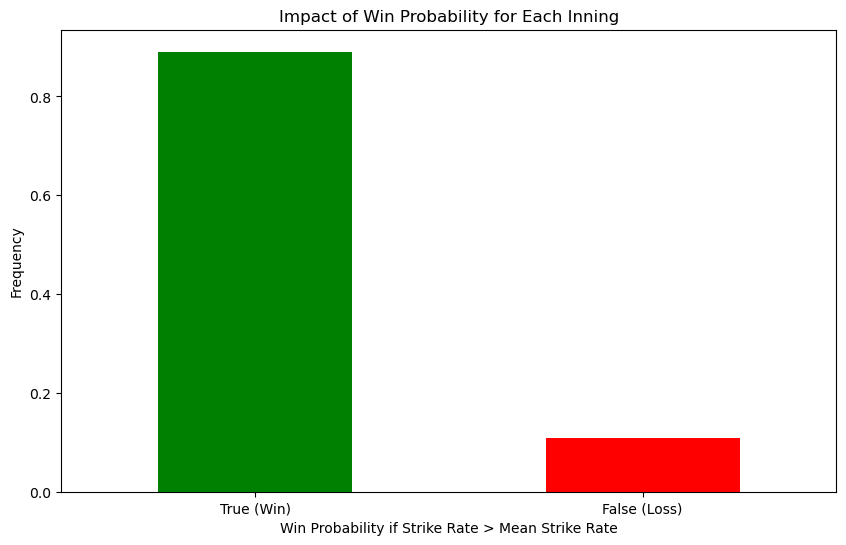

In [22]:
import matplotlib.pyplot as plt

# Plot the win probabilities
plt.figure(figsize=(10, 6))
most_balled_batters_df['strike_rate_greater_than_mean'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title("Impact of Win Probability for Each Inning")
plt.xlabel("Win Probability if Strike Rate > Mean Strike Rate")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["True (Win)", "False (Loss)"], rotation=0)
plt.show()
